# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

## 2. Weekly graph question

### Outlier Analysis
- The three outliers in the **upper-left corner** have a **low first principal component score** and a **high second principal component score**.  

### Principal Component Scores
- **First PC (low):** They differ significantly from the main trend that is driven primarily by series_1 and series_2.  
- **Second PC (high):** Their variation is dominated by series_3, which is less correlated with series_1 and series_2.  

### What this means for the series
- **series_3:** These points are likely extreme outliers in series_3 (either much higher or much lower than the rest of the data).
- **series_1 & series_2:** Their values in series_1 and series_2 are unclear because these two series are highly correlated and both load primarily on the first component.
- **Relative values of series_1 vs series_2:** It is **almost impossible to determine** their relative difference because PCA combines them into the same first component.

### Why series_3 is clearer
- Series_3 is largely orthogonal (uncorrelated) to series_1 and series_2.
- This separation causes it to appear predominantly in the second component, making its effect easier to interpret in the scatter plot.

### Relationship between series_1 and series_2
- By construction, series_2 was generated from series_1 with added small random noise.
- As a result, they are strongly positively correlated and essentially measure the same underlying trend.

### Pairplot Observation
- A pairplot would show:
  - A tight diagonal linear relationship between series_1 and series_2.
  - A more dispersed relationship between either of those and series_3.
  - Outliers in series_3 appearing clearly separated.

### Advantages of the graph
1. Reduces dimensionality to 2D, allowing for easy visualization.
2. Highlights correlation structure (e.g., series_1 and series_2 redundancy).
3. Makes outliers easy to detect (upper-left corner).
4. Useful for feature selection (e.g., potential removal of redundant variables).

### Disadvantages of the graph
1. Loses interpretability in original feature space.
2. Does not show direct values of series_1, series_2, or series_3.
3. Cannot distinguish relative values between highly correlated variables (series_1 vs. series_2).
4. Requires additional context (PCA loadings) to fully explain component meaning.

### Interesting findings
- The graph confirms:
  - series_1 and series_2 are essentially duplicates.
  - series_3 is independent and explains secondary variation.
  - Three outliers with extreme series_3 values stand out clearly.


[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

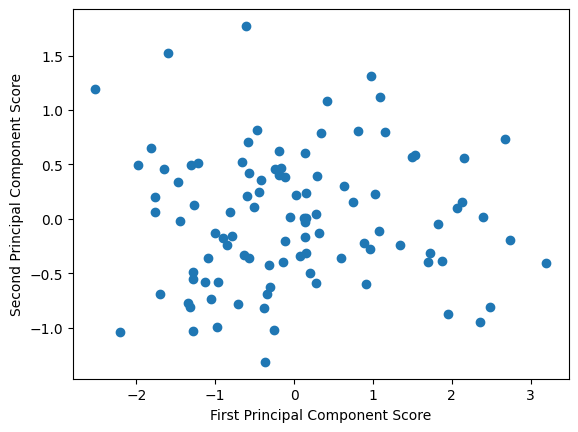

In [29]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

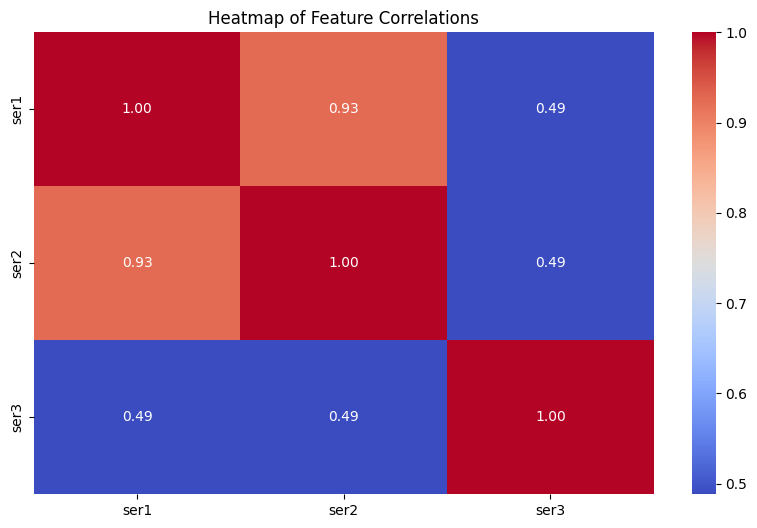

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `df` is your dataset
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()


/home/codespace/.local/lib/python3.12/site-packages/matplotlib/collections.py:999: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


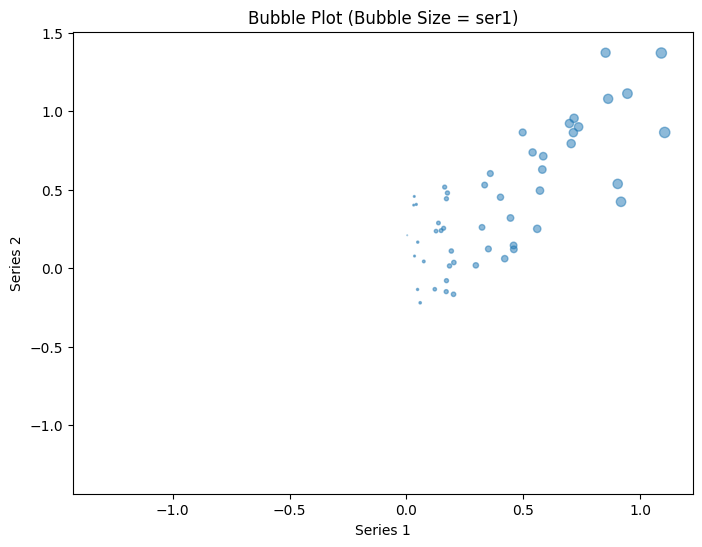

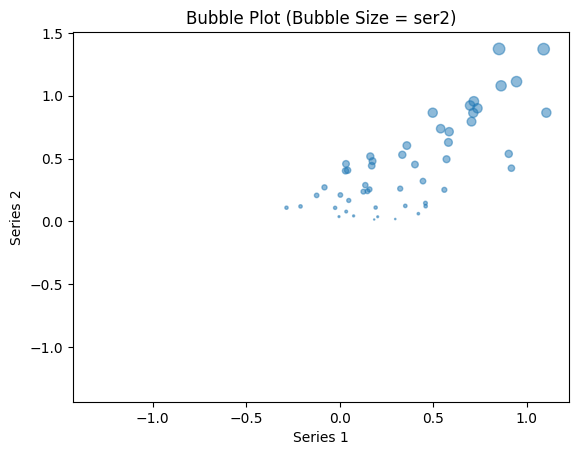

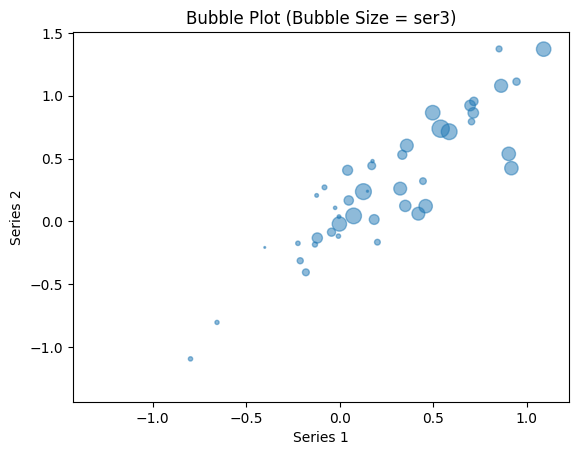

In [31]:
plt.figure(figsize=(8, 6))


plt.scatter(df['ser1'], df['ser2'], s=df['ser1'] * 50, alpha=0.5)
plt.xlabel('Series 1')
plt.ylabel('Series 2')
plt.title('Bubble Plot (Bubble Size = ser1)')
plt.show()


plt.scatter(df['ser1'], df['ser2'], s=df['ser2'] * 50, alpha=0.5)
plt.xlabel('Series 1')
plt.ylabel('Series 2')
plt.title('Bubble Plot (Bubble Size = ser2)')
plt.show()


plt.scatter(df['ser1'], df['ser2'], s=df['ser3'] * 50, alpha=0.5)
plt.xlabel('Series 1')
plt.ylabel('Series 2')
plt.title('Bubble Plot (Bubble Size = ser3)')
plt.show()



Explained variance ratio: [0.76504053 0.21021648]


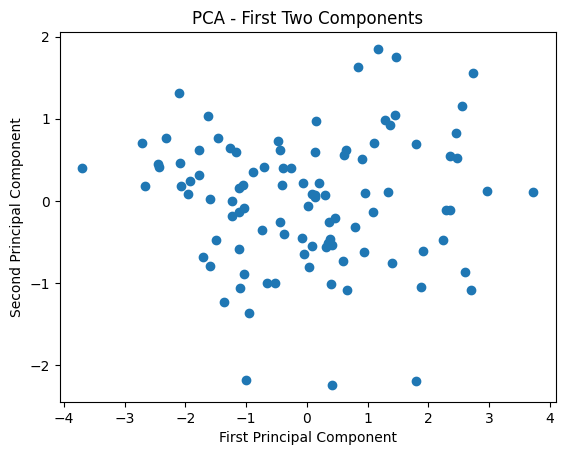

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaled_data = StandardScaler().fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# Scatter plot for PCA
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA - First Two Components")
plt.show()


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Use ser1 and ser2 as features, and ser3 as the target
X = df[['ser1', 'ser2']]
y = df['ser3']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R² Score: 0.13268180218194192
Coefficients: [0.23207547 0.90844982]
Intercept: -0.046854517735625635


# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

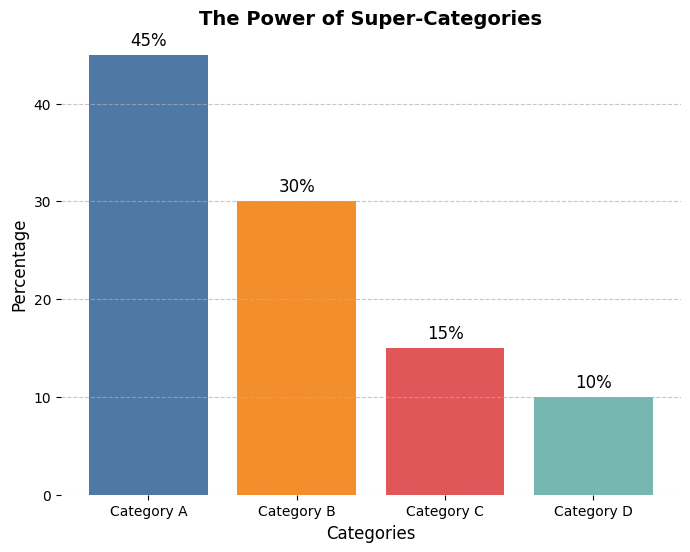

In [34]:
import matplotlib.pyplot as plt

# Example data: categories and values
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [45, 30, 15, 10]

# Create a clean bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color=['#4e79a7', '#f28e2b', '#e15759', '#76b7b2'])

# Add value labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() + 1, 
             f'{bar.get_height()}%', 
             ha='center', fontsize=12)

# Titles and labels
plt.title('The Power of Super-Categories', fontsize=14, weight='bold')
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('Categories', fontsize=12)

# Remove unnecessary chart junk
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.box(False)

# Show the plot
plt.show()


This bar chart was created to replicate the style discussed in "Storytelling With Data" (pp. 136–150).
It demonstrates the use of clear labeling, simplified formatting, and emphasis on data readability.
- Bold title and simple labels ensure clarity.
- Minimal colors reduce distraction while highlighting comparisons.
- Direct data labels above each bar avoid the need to read the axis grid lines.